# **Jumia Book Recommendation System**

##### **Authors**:
<ul type='square'> 
    <li> Alice Wamuyu</li>
    <li> Eva Moisasi</li>
    <li> Fridah Kimathi </li>
    <li> Nicholus Magak  </li>
</ul>

# **Business Understanding**

<img src="Images\book3.png" alt="My Image" width="700" height="300"> 

## **Overview**

> **What is a Recommendation System?**

A Recommendation System is a type of artificial intelligence that provides personalized suggestions to customers. Previously, people would often rely on recommendations from friends to make purchasing decisions. However, with the rise of recommendation systems, companies like Google and Youtube can use data such as search history, watch history, and purchase history to suggest products or content that the customer may be interested in.

> **Reasons for a Recommendation System?**

Over the past few decades, the emergence of web services such as Youtube, Amazon, and Netflix has led to the increasing prevalence of recommender systems in our daily lives. These systems suggest relevant items to users based on their preferences, from products to buy on e-commerce websites to content to view in online advertising.
By using a recommendation system, companies can generate substantial revenue and gain a  competitive advantage over comptetiors by having a high customer retention. These systems are now so sophisticated that they can even provide recommendations to new customers who visit a site for the first time. They can suggest trending or highly rated products as well as items that are likely to generate the most profit for the company.

**Types Of Recommendation System**

A recommendation system is usually built using 3 techniques which are content-based filtering, collaborative filtering, and a combination of both.

**_1. Content-Based Filtering_**

The algorithm recommends a product or items that have similar characteristics to the ones that the user has already shown an interest in.. In simple words, In this algorithm, we try to find items that look alike.

**_2. Collaborative-based Filtering_**

Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen.

### **Problem Statement**
As a rapidly growing online retailer, Jumia has a vast collection of books. Most self-published authors sell 250 books or less, regardless of how many different books they write. Traditionally published books sell around 3,000 copies on average, with only 250 of those sales in the first year. It's rare that books sell over 100,000 copies and even rarer to sell more than a million (How Many Books Do You Need To Publish To Make Money? - Letter Review, 2022). 
An attributing factor to the poor sales of potentially good books in the public’s eye is that there are too many books that major recommenders can read which can also be fueled by people sticking to specific authors rather than exploring due to the fear of reading a potentially different genre than what their tastes are accustomed to.

To address this issue, Jumia can implement an A.I model that uses a collaborative filtering technique. By doing so, they will not only recommend books based on the customers’ ratings but also suggest books that are similar to the ones that the customer has shown an interest in.

### **Objectives**

> **General Objective:**

The general objective is to enable Jumia to effectively provide its customers with book recommendations that are tailored to the users.
> **Specific Objectives:**

Develop a machine learning model that can accurately predict the rating a user will give to books they haven't read based on their previous ratings.
Integrate the prediction model into a recommendation system to provide personalized book recommendations to users based on their predicted ratings.
To evaluate the performance of the recommendation system using appropriate metrics and compare it with other models.

### **Success Criteria**

The success criteria we will follow depends on the predictive accuracy of the recommendations. This means we will rate how close the estimated ratings are to genuine use ratings, which is a measure used for evaluating non-binary ratings (e.g. 1-10 scale). Since selling books is crucial for a platform that is in business, this is the best metric we decided to use.

The two metrics that we will use are Mean Squared Error (M.S.E) and Root Mean Squared Error (R.M.S.E) due to the fact the rating scale is the same throughout.



#### **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')
from dataprep.clean import clean_country #pip install dataprep
import pycountry #conda install -c conda-forge pycountry
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


#### **Loading the data**

##### _**1. ratings_df**_

In [2]:
ratings_df = pd.read_csv('Data/BX-Book-Ratings.csv', encoding='latin-1', sep=';', on_bad_lines='skip', low_memory=False)
ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##### _**2. books_df**_

In [3]:
books_df = pd.read_csv('Data/BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


##### _**3. users_df**_

In [4]:
users_df = pd.read_csv('Data/BX-Users.csv',  sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# **Data Understanding**

The Book Recommendation Data used in this project is from <a href='https://www.kaggle.com/datasets/rxsraghavagrawal/book-recommender-system'> Kaggle.</a>. The data contained three files: 

* **_Users.csv_**

Contained the users. Some of the features in this file include user IDs (User-ID) which have been anonymized and map to integers. Demographic data such as (Location, Age)  was also provided where it was available. Otherwise, these fields contained null values.

* **_Books.csv_**

Contained books. Books were identified by their respective International Standard Book Number(ISBN).Some content-based information given (Book-Title, Book-Author, Year-Of-Publication, Publisher), was obtained from Amazon Web Services. In the case of several authors, only the first was provided. URLs linking to cover images were also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

* **_Ratings.csv_**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


##### _**1. ratings_df**_

In [5]:
ratings_df.info()

# Observations:
 # The dataframe has no missing values
 # It has 1149780 rows and 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


_**Univariate Analysis**_

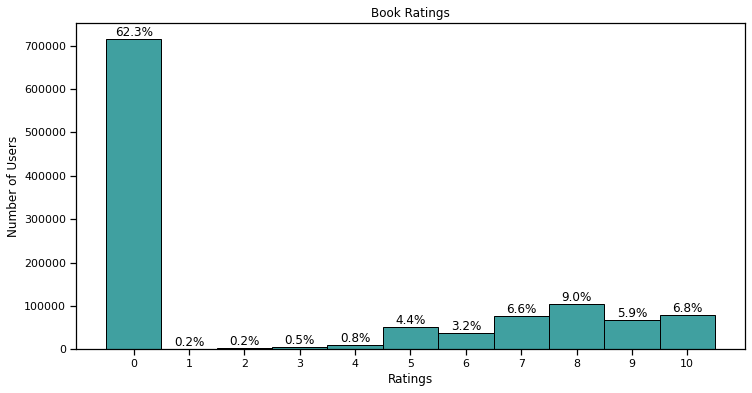

In [6]:

fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(ratings_df['Book-Rating'], bins = np.arange(12) - 0.5, color='teal', ax=ax)
ax.set_xticks(range(0,11))
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Users')
ax.set_title('Book Ratings');

rating_count = ratings_df['Book-Rating'].value_counts().sort_index()
for i, val in enumerate(rating_count.values):
    ax.text(i, val+10, (f'{round((val/sum(rating_count.values))*100, 1)}%'), ha='center', va='bottom',size=12)  
    
    # Observations:
    # The book rating ranges from 0 to 10
    # Most books have a rating of 0
    # The ratings between 1-4 have very few books

##### _**2. books_df**_

In [7]:
books_df.info()

# Observations:
    # The dataframe has 271360 rows and 8 columns
    # The columns Book-Author, Publisher, Image-URL-L have missing values
    # All the columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
books_df['Year-Of-Publication'].unique()

# Observations:
    # The two missing Publisher names were put in the Year-Of-Publication column

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [9]:
books_df[(books_df['Year-Of-Publication'] == 'DK Publishing Inc' ) | (books_df['Year-Of-Publication'] == 'Gallimard' )]
# Observations:
    # There seems to be a mix-up with the column entries that lead to the three missing values in the Image-URL-L

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
# Removing the mix-up to be able to understand the date further

removed_mixup = books_df[(books_df['Year-Of-Publication'] != 'DK Publishing Inc' ) & (books_df['Year-Of-Publication'] != 'Gallimard' )].copy()

removed_mixup['Year-Of-Publication'] = removed_mixup['Year-Of-Publication'].astype(int)
removed_mixup = removed_mixup[(removed_mixup['Year-Of-Publication'] < 2024 ) & (removed_mixup['Year-Of-Publication'] >= 1000)]

In [11]:
# The statistical summary of the Year-Of-Publication column
removed_mixup['Year-Of-Publication'].describe()

# Observations:
    #The least year is 0. This might be a placeholder for missing years
    # The highest year is 2050. This is a year in the future and might bring issues later
    # On average most books in this dataset were published in 1959

count    266726.000000
mean       1993.687833
std           8.321200
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

**Checking for the trend in book production over time**

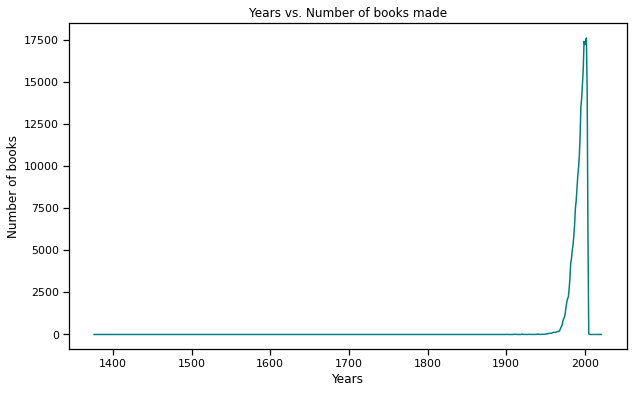

In [12]:
# years and books made
years = removed_mixup['Year-Of-Publication'].value_counts()
years

myKeys = list(years.keys())
myKeys.sort()

X = myKeys
y = []
for i in myKeys:
    y.append(years[i]) 

year_plot = pd.DataFrame()
year_plot['years'] = X
year_plot['numbers'] = y

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='years', y='numbers', data=year_plot, color='teal')

ax.set(xlabel='Years', ylabel='Number of books', 
       title='Years vs. Number of books made')
plt.show()
# Observations:
    # Most books in the dataset were published from 1950 to 202

##### _**3. users_df**_

In [13]:
users_df.info()

# Observations:
    # The dataset has 278858 rows and 3 columns
    # The Age column has alot of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
# Statistical summary of the Age column
users_df.Age.describe()

# Observations:
    # The least age is 0 and the oldest is 244 which is not possible
    # The average age is 34

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

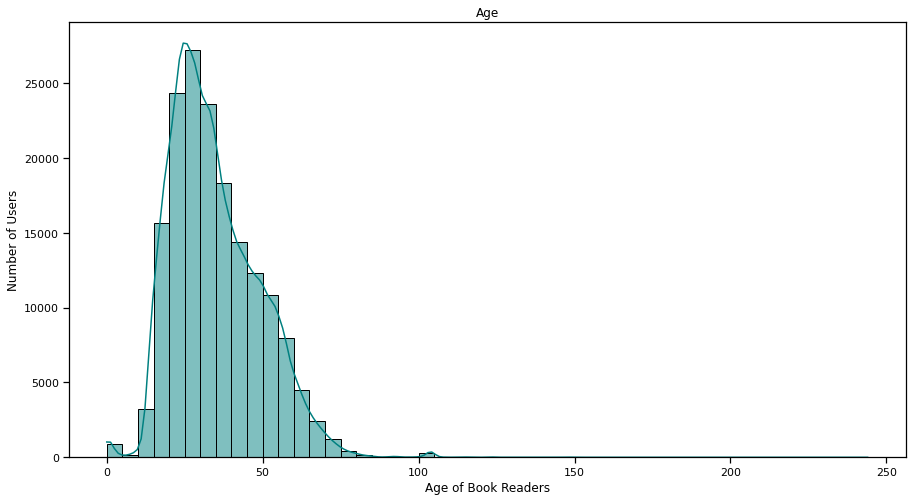

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(users_df.Age, bins=range(0, 245, 5), kde=True, color='teal')
ax.set_xlabel('Age of Book Readers')
ax.set_ylabel('Number of Users')
ax.set_title('Age');
# Observations:
    # Most readers are below 50 years of age

#### **Creating a complete dataframe by joining the 3 dataframes above:**

The number of books and users we have so far is way too many. As we had observed earlier, the dataset has 270151 books and 92,106 unique users. The book ratings in the dataset are a combination of implicit and explicit. We observed earlier that the implicit ratings had a higher number of book than explicit which is understandable.This means that we might have users who registered to the website, viewed a few books but never read any of them or users who have read books but never rated them. This type of users cannot be relied on to in the creation of the recommender system. 

We will therefore only use explicit ratings(1-10)

In [16]:
ratings_df = ratings_df[ratings_df['Book-Rating'] > 0]

#### **Joining ratings_df and users_df**

In [17]:
ratings_books = pd.merge(ratings_df, books_df,on='ISBN', how='inner')
print(ratings_books.info())
ratings_books

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              383842 non-null  int64 
 1   ISBN                 383842 non-null  object
 2   Book-Rating          383842 non-null  int64 
 3   Book-Title           383842 non-null  object
 4   Book-Author          383841 non-null  object
 5   Year-Of-Publication  383842 non-null  object
 6   Publisher            383840 non-null  object
 7   Image-URL-S          383842 non-null  object
 8   Image-URL-M          383842 non-null  object
 9   Image-URL-L          383841 non-null  object
dtypes: int64(2), object(8)
memory usage: 32.2+ MB
None


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383838,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383839,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383840,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


#### **Joining ratings_books and users_df**

In [18]:
complete_df = pd.merge(ratings_books, users_df, on='User-ID', how='inner')
print(complete_df.info())
complete_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   ISBN                 383842 non-null  object 
 2   Book-Rating          383842 non-null  int64  
 3   Book-Title           383842 non-null  object 
 4   Book-Author          383841 non-null  object 
 5   Year-Of-Publication  383842 non-null  object 
 6   Publisher            383840 non-null  object 
 7   Image-URL-S          383842 non-null  object 
 8   Image-URL-M          383842 non-null  object 
 9   Image-URL-L          383841 non-null  object 
 10  Location             383842 non-null  object 
 11  Age                  269621 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 38.1+ MB
None


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",NaN
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"n/a, n/a, n/a",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383837,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,"singapore, n/a, singapore",15.0
383838,276664,0004703723,9,Dictionary Of Economics-2Nd Ed,Christopher Pass,1991,Trafalgar Square,http://images.amazon.com/images/P/0004703723.0...,http://images.amazon.com/images/P/0004703723.0...,http://images.amazon.com/images/P/0004703723.0...,"daventry, england, united kingdom",31.0
383839,276664,0140136908,7,History of Economic Thought (Penguin Economics),William J. Barber,1992,Penguin USA,http://images.amazon.com/images/P/0140136908.0...,http://images.amazon.com/images/P/0140136908.0...,http://images.amazon.com/images/P/0140136908.0...,"daventry, england, united kingdom",31.0
383840,276664,0631189629,9,British Social Policy Since 1945 (Making Conte...,Howard Glennerster,1996,Blackwell Publishers,http://images.amazon.com/images/P/0631189629.0...,http://images.amazon.com/images/P/0631189629.0...,http://images.amazon.com/images/P/0631189629.0...,"daventry, england, united kingdom",31.0


> **Performing analysis on _complete df_**

**1. Check the number of unique books in the dataframe**

In [19]:
complete_df['ISBN'].nunique()

# Observations:
    # There are 149,836 unique books in the dataset.

149836

**2. Checking the years the books were published**

In [20]:
complete_df['Location'].unique()

# Observations:
    # The locations are represented by city name, state name and country. This can be narrowed down to just country

array(['seattle, washington, usa', 'rijeka, n/a, croatia',
       'torrance, california, usa', ..., 'dublin, county dublin, ireland',
       'wilkes-barre area, pennsylvania, usa',
       'stuttgart, \\n/a\\"., germany"'], dtype=object)

**3. Checking the number of authors in the dataframe**

In [21]:
complete_df['Book-Author'].nunique()

# There are 62,113 book authors in the dataset. 

62113

**4. Checking for author popularity to determine**

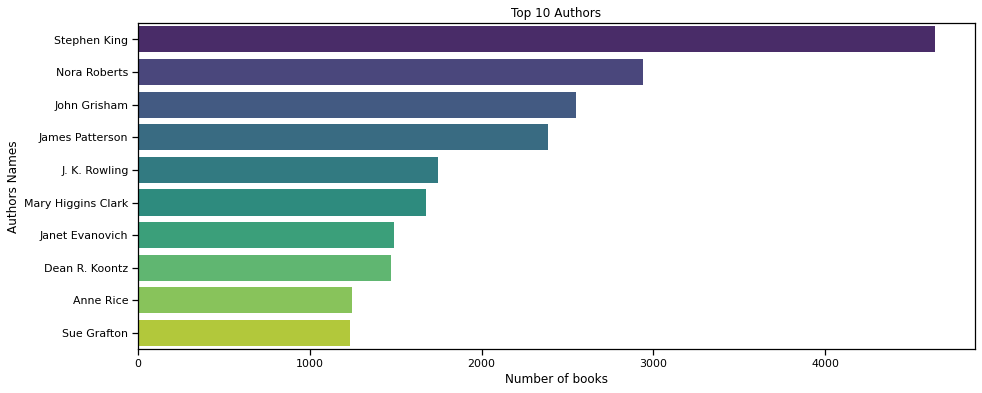

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Book-Author'].value_counts()[:10].values, 
            y=complete_df['Book-Author'].value_counts()[:10].index,
            orient='h',
            palette='viridis',
            ax=ax
            )
ax.set_xlabel('Number of books')
ax.set_ylabel("Authors Names")
ax.set_title('Top 10 Authors');

# Observations:
    # Stephen King is the most popular author with 10,000 copies sold

**5. Checking for the most popular books**

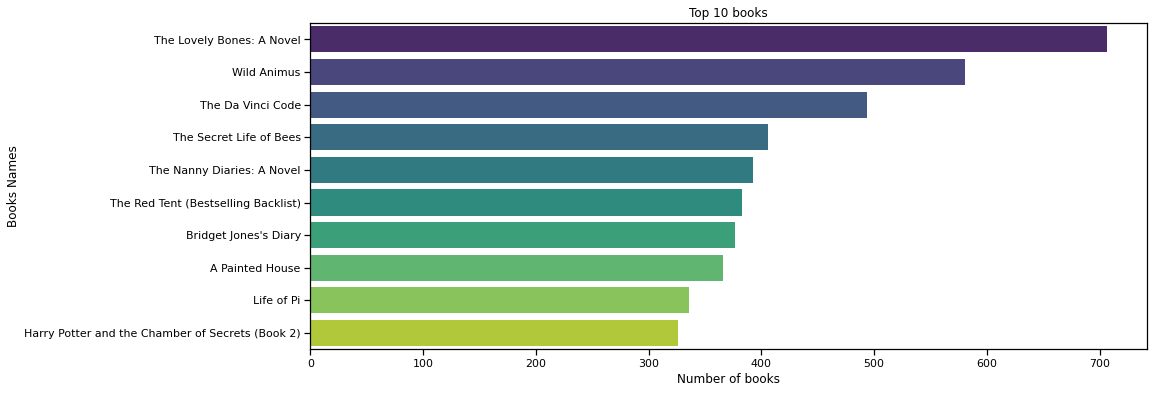

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Book-Title'].value_counts()[:10].values, 
            y=complete_df['Book-Title'].value_counts()[:10].index,
            orient='h',
            palette='viridis',
            ax=ax
            )
ax.set_xlabel('Number of books')
ax.set_ylabel("Books Names")
ax.set_title("Top 10 books");

# Observations:
    # Wild Animus is the most popular book with 2500 copies sold.

**6. Average rating per book**

In [24]:
average_rating = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].mean())
average_rating['RatingCount'] = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].count())
average_rating.sort_values('RatingCount', ascending=False).head(10)
# Observations:
    # A high number of users rating the book and does not equate to a high rating
    # For instance the first book has many users who have rated it but it has a low rating 0f 1.01

,Book-Rating,RatingCount
Book-Title,,
The Lovely Bones: A Novel,8.185290,707
Wild Animus,4.390706,581
The Da Vinci Code,8.439271,494
The Secret Life of Bees,8.477833,406
The Nanny Diaries: A Novel,7.437659,393
The Red Tent (Bestselling Backlist),8.182768,383
Bridget Jones's Diary,7.625995,377
A Painted House,7.398907,366
Life of Pi,8.080357,336


**7. Checking for book publishers in the dataset**

In [25]:
complete_df['Publisher'].nunique()

# Observations:
    # There are 11,575 publishers highlighted in the dataset

11575

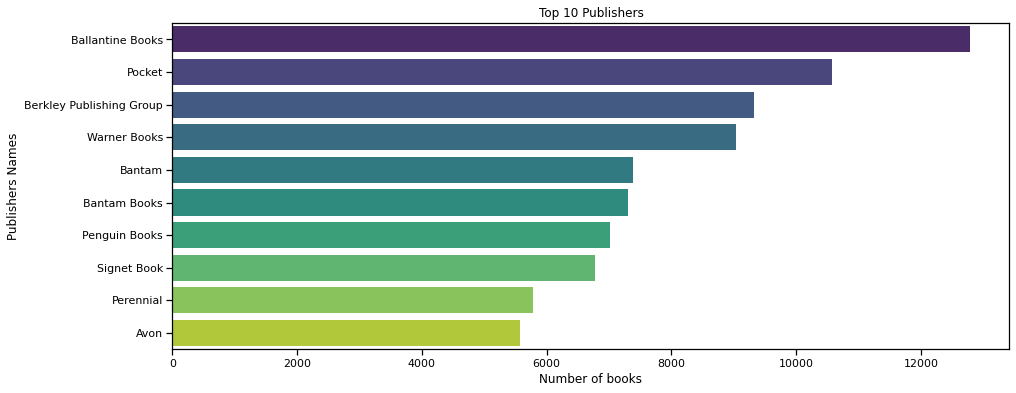

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Publisher'].value_counts()[:10].values, 
            y=complete_df['Publisher'].value_counts()[:10].index,
            orient='h',
            palette='viridis',
            ax=ax
            )
ax.set_xlabel("Number of books")
ax.set_ylabel("Publishers Names")
ax.set_title("Top 10 Publishers");

# Observations:
    # The most popular publisher has sold about 35000 copies

# **Data Preparation**

**i. Removing irrevelant columns**

The removed columns are:
* **_Book-Title_**: ISBN and Book-Title represent the same thing, hence one of the columns can be dropped

* **_Year-Of-Publication_**: The year the book was published might have little effect on the model

* **_Image-URL-S, Image-URL-M, Image-URL-L_**: These columns represent the URL to the book covers and will have no effect on the model

**NB:** The columns Book-Author and Publisher will be keep since some readers may have the habit of reading books from a particular publisher or author because thats their niche. Hence recommending books from these authors/publishers might be beneficial.

In [27]:
complete_df.drop(['Book-Title', 'Year-Of-Publication','Image-URL-S', 'Image-URL-M','Image-URL-L'], \
                 axis=1, inplace=True)
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
0,276726,0155061224,5,Judith Rae,Heinle,"seattle, washington, usa",NaN
1,276729,052165615X,3,Philip Prowse,Cambridge University Press,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,Sue Leather,Cambridge University Press,"rijeka, n/a, croatia",16.0
3,276744,038550120X,7,JOHN GRISHAM,Doubleday,"torrance, california, usa",NaN
4,11676,038550120X,10,JOHN GRISHAM,Doubleday,"n/a, n/a, n/a",NaN


**ii. Dealing with dupicates**

Duplicates were checked using the User-ID and ISBN since we don't want a user to rate the same book more than once.

In [28]:
complete_df.duplicated(subset=['User-ID', 'ISBN'], keep=False).sum()

# Observations:
    # The data has no duplicates

0

**iii. Dealing with missing values**

In [29]:
# Columns with missing values
{col:complete_df[col].isnull().sum() for col in complete_df.columns if complete_df[col].isnull().sum()}

{'Book-Author': 1, 'Publisher': 2, 'Age': 114221}

* **_Book-Author Column_**

In [30]:
# Book- Author column

complete_df[complete_df['Book-Author'].isnull()]

# Checking online, the book Credit Suisse Guide to Managing Your Personal Wealth was authored by Larissa Anne Downes

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
261953,98647,9627982032,8,NaN,Edinburgh Financial Publishing,"selayang, selangor, malaysia",26.0


On checking <a href='https://www.goodreads.com/book/show/7253684-credit-suisse-guide-to-managing-your-personal-wealth'> online</a>, the book _**Credit Suisse Guide to Managing Your Personal Wealth** (ISBN: 9627982032)_ was authored by **Larissa Anne Downes**

In [31]:
# Filling in the missing value with the name of the author
complete_df['Book-Author'].fillna(value='Larissa Anne Downes', inplace=True)

In [32]:
# Confirming the missing value in this column has been removed
complete_df['Book-Author'].isnull().sum()

0

* _**Publisher column**_

In [33]:
# Publisher column

complete_df[complete_df['Publisher'].isnull()]

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
82262,98391,193169656X,9,Elaine Corvidae,NaN,"morrow, georgia, usa",52.0
82271,98391,1931696993,9,Linnea Sinclair,NaN,"morrow, georgia, usa",52.0


On checking <a href='https://www.amazon.com/Tyrant-Moon-Elaine-Corvidae/dp/159426029X'> online</a>, the book _**Tyrant Moon** (ISBN: 193169656X)_ was published by **Mundania Press LLC**.

On checking <a href='https://www.goodreads.com/en/book/show/352725'> online</a>, the book _**Finders Keepers** (ISBN: 1931696993)_ was published by **Bantam**.

In [34]:
# Filling in the missing values with the name of the publishers

complete_df[complete_df['ISBN']=='193169656X'] = complete_df[complete_df['ISBN']=='193169656X'].fillna(value='Mundania Press LLC')
complete_df[complete_df['ISBN']=='1931696993'] = complete_df[complete_df['ISBN']=='1931696993'].fillna(value='Bantam')

In [35]:
# Confirming the missing value in this column has been removed
complete_df['Publisher'].isnull().sum()

0

* _**Age column**_

In [36]:
complete_df.Age.isnull().value_counts(normalize=True)

# 29% of the values in this column are missing. The missing values will be replaced with the median

False    0.702427
True     0.297573
Name: Age, dtype: float64

In [37]:
# We will fill in the missing values using the median since it is not affected by outliers which we has observed earlier
median =complete_df['Age'].median()
complete_df.Age.fillna(value=median, inplace=True)

In [38]:
# Confirming the missing value in this column has been removed
complete_df['Age'].isnull().sum()

0

**iv. Splitting location to represent the user country only**

In [39]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip(string.punctuation)
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
0,276726,0155061224,5,Judith Rae,Heinle,usa,35.0
1,276729,052165615X,3,Philip Prowse,Cambridge University Press,croatia,16.0
2,276729,0521795028,6,Sue Leather,Cambridge University Press,croatia,16.0
3,276744,038550120X,7,JOHN GRISHAM,Doubleday,usa,35.0
4,11676,038550120X,10,JOHN GRISHAM,Doubleday,n/a,35.0


In [40]:
complete_df['Location'].unique()

# There are countries represented by more than one format.
# Eg. 'usa', 'us', 'u.s' and 'united states' all mean the same thing
# The are also countries which are not countries at all eg.prince william
# We will clean up the country names using dataprep module

array([' usa', ' croatia', ' n/a', ' portugal', '', ' new zealand',
       ' netherlands', ' canada', ' austria', ' romania', ' australia',
       ' spain', ' switzerland', ' united kingdom', ' saudi arabia',
       ' malaysia', ' philippines', ' germany', ' antarctica', ' k1c7b1',
       ' italy', ' us', ' catalunya', ' iran', ' dominican republic',
       ' south korea', ' mexico', ' quit', ' france', ' india',
       ' ireland', ' finland', ' greece', ' ghana', ' phillipines',
       ' japan', ' belgium', ' tajikistan', ' united state', ' brazil',
       ' hong kong', ' singapore', ' cayman islands', ' cyprus', ' china',
       ' kuwait', ' luxembourg', ' turkey', ' norway', ' peru',
       ' czech republic', ' sweden', ' trinidad and tobago',
       ' euskal herria', ' israel', ' tunisia', ' alderney', ' denmark',
       ' aruba', ' thailand', ' rutherford', ' indonesia',
       ' south africa', ' nepal', ' united states', ' macedonia',
       ' kenya', ' mauritius', ' poland', ' n

In [41]:
# Using clean_country function in the dataprep.clean module

countries = complete_df[['Location']]
countries_df = clean_country(countries, 'Location')
countries_df

Country Cleaning Report:
	365795 values cleaned (95.3%)
	583 values unable to be parsed (0.15%), set to NaN
Result contains 365795 (95.3%) values in the correct format and 18047 null values (4.7%)


,Location,Location_clean
0,usa,United States
1,croatia,Croatia
2,croatia,Croatia
3,usa,United States
4,n/a,NaN
...,...,...
383837,singapore,Singapore
383838,united kingdom,United Kingdom
383839,united kingdom,United Kingdom
383840,united kingdom,United Kingdom


In [42]:
# There are countries that could not be identified and those values were filled with Nan
complete_df['Location_clean'] = countries_df['Location_clean']
complete_df['Location_clean'].isnull().sum()

18047

In [43]:
# The missing values will therefore be filled with the phrase('Unknown')

complete_df['Location_clean'].fillna(value='Unknown', inplace=True)

**Visualizing the average book ratings per country**

In [44]:
country_group = pd.DataFrame(complete_df.groupby('Location_clean')['Book-Rating'].mean()).reset_index()
country_group.columns=['Country', 'Average Rating']
country_group.head(2)

,Country,Average Rating
0,Afghanistan,4.0
1,Albania,5.2


In [45]:
import plotly.express as px

fig =px.choropleth(country_group, 
                   locations='Country',
                   color='Average Rating',
                   locationmode='country names',
                   hover_name='Country',
                   projection="natural earth",
                   scope="world",
                   color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title_text="Average Rating per Country",
    title_x=0.5,
    title_y=0.95,
    geo=dict(showframe=False,
             showcoastlines=False,
             projection_type='equirectangular',
             scope='world',
             landcolor='gray',
             lakecolor='white'),
    height=400,
    width=800,
    dragmode=False
)
fig.show()

**Visualizing the average age of the readers per country**

In [46]:
country_group = pd.DataFrame(complete_df.groupby('Location_clean')['Age'].mean()).reset_index()
country_group.columns=['Country', 'Average Age']
country_group.head(2)

,Country,Average Age
0,Afghanistan,56.666667
1,Albania,35.000000


In [47]:
import plotly.express as px

fig =px.choropleth(country_group, 
                   locations='Country',
                  color='Average Age',
                  locationmode='country names',
                hover_name='Country',
                projection="natural earth",
                scope="world",
                color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title_text="Average Age per Country",
    title_x=0.5,
    title_y=0.95,
    geo=dict(showframe=False,
             showcoastlines=False,
             projection_type='equirectangular',
             scope='world',
             landcolor='gray',
             lakecolor='white'),
    height=400,
    width=800,
    dragmode=False
)
fig.show()
# Observations:
  # The graph proves what we had observed earlier. Most readers are under 50.

**v. Checking the datatypes**

In [48]:
complete_df.dtypes

# Observation:
    # All the datatypes are correct except for age

User-ID             int64
ISBN               object
Book-Rating         int64
Book-Author        object
Publisher          object
Location           object
Age               float64
Location_clean     object
dtype: object

In [49]:
# Changing the age column datatype
complete_df['Age'] = complete_df['Age'].astype(int)

# **Modelling**

**a. Popularity Based Recommendation**

grouped = ratings_books.groupby('ISBN')
popular_books = pd.DataFrame(grouped['Book-Rating'].agg([np.size, np.mean]))
most_popular = popular_books.sort_values(['mean'], ascending=False)
pop=most_popular[most_popular['size']>200]
pop_title=list(pop[:10].index)
titles=[]
for i in pop_title:
    titles.append(books_df['Book-Title'].loc[books_df['ISBN']==i].values[0])
index=1
for i in titles:
    print(index,'. ',i)
    index+=1

**_This is a simple recommendation system that does not focus on user tastes_**

**b. CF based recommendation system**

* We will not be implementing Collaborative Filtering from scratch. 
 Instead, we will use the Surprise library that used extremely powerful algorithms like
**Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.**

In [50]:
# surprise reader
reader = Reader(rating_scale=(1, 10))

In [51]:
data = Dataset.load_from_df(ratings_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

In [52]:
model = SVD()
# cross_validate(model, trainset, measures=['rmse', 'mae'], cv=5)

In [53]:
# data_train = data.build_full_trainset()
model.fit(trainset)

In [54]:
predictions = model.test(testset)

In [55]:
# Viewing contents of test set
for uid, bid, rating in testset[:5]:
    print(f"User {uid} rated book {bid} with a rating of {rating}")

User 43006 rated book 0441731546 with a rating of 7.0
User 63714 rated book 0600566145 with a rating of 9.0
User 250413 rated book 0553232320 with a rating of 9.0
User 53772 rated book 00196048 with a rating of 7.0
User 98391 rated book 0425193713 with a rating of 8.0


In [56]:
# Viewing predictions
for prediction in predictions[0:5]:
    print(prediction)

user: 43006      item: 0441731546 r_ui = 7.00   est = 7.68   {'was_impossible': False}
user: 63714      item: 0600566145 r_ui = 9.00   est = 9.27   {'was_impossible': False}
user: 250413     item: 0553232320 r_ui = 9.00   est = 7.40   {'was_impossible': False}
user: 53772      item: 00196048   r_ui = 7.00   est = 7.71   {'was_impossible': False}
user: 98391      item: 0425193713 r_ui = 8.00   est = 9.20   {'was_impossible': False}


In [57]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 1.6402


1.640170502530782

In [58]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

**Recommending unread books to the test set**

In [59]:
# Get list of user ids from test set
users = list(set(uids))

In [60]:
# books which the users have not yet evaluated
books = trainset.build_anti_testset()

MemoryError: 

In [ ]:
# using an example of 15 users
for user_id in users[0:15]:
    user_books = list(filter(lambda x: x[0] == user_id, books))
    
    print(f'This user {user_id} has rated {len(user_books)} books')
    
    # generate recommendations
    recommendations = model.test(user_books)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    
    print(f"This user {user_id}'s recommendations:")
    # viewing 3 recommendations if available
    for reco in recommendations[0:3]:
        print(f'Book {reco[1]} with estimated rating {reco[3]}')

For book with ID **0060973129**, we get an estimated prediction of **1**. One startling feature of this recommender system is that it doesn't care what the book contains or its context. It works purely on the basis of an assigned book ID and tries to predict ratings based on how the other users have perceive the book

**c. Hybrid recommendation system**

* In this section, will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work

In [ ]:
def hybrid_recommender(userId, bookTitle):
    idx = indices[titles]
    uid = id_map.loc[title]['User-ID']
    book_id = id_map.loc[title['ISBN']]
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

# **Evaluation**

# **Conclusion and Recommendations**